# Excercise 1

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt
import os
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.black_litterman import BlackLittermanModel
from scipy import stats

### Load Data

In [2]:
#Read excel and remove first two rows

stocks_daily = pd.read_excel("data for exam 2022.xlsx", "stocks daily", index_col = "Name")
stocks_daily = stocks_daily.iloc[2:]
stocks_daily = stocks_daily.astype("float32")

In [3]:
#See NAs

stocks_daily.isna().sum()

LEONARDO          0
ECOSUNTEK         0
LANDI RENZO       0
PIRELLI & C     719
STELLANTIS        0
               ... 
BEGHELLI          0
SOL               0
DATALOGIC         0
BIESSE            0
SAFILO GROUP      0
Length: 88, dtype: int64

### 1.

In [4]:
if not os.path.exists("descriptive_statistics"):
    os.makedirs("descriptive_statistics")

#### Compute returns

In [5]:
stocks_daily_returns = stocks_daily.pct_change()

stocks_daily_returns.to_excel("Returns.xlsx")
stocks_daily_returns

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
Name,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.000646,0.000000,0.002020,NaN,0.007800,0.018395,0.004693,0.013212,NaN,0.018743,...,-0.007884,-0.002344,0.016748,0.018609,0.000000,-0.007472,0.001503,-0.002247,0.022436,0.014855
2015-01-05,-0.038810,0.000000,0.003528,NaN,-0.021703,-0.019971,-0.010061,-0.059495,NaN,-0.066237,...,-0.026895,-0.049554,-0.031881,0.002885,-0.005372,-0.008783,0.009752,-0.004505,0.040752,-0.029258
2015-01-06,-0.010767,0.000000,-0.010547,NaN,0.015863,-0.002536,-0.015971,-0.013865,NaN,-0.013793,...,0.000000,-0.027579,-0.002195,0.015340,-0.005400,-0.010127,-0.002972,-0.004525,0.043173,-0.021664
2015-01-07,0.015646,0.000000,0.007614,NaN,0.008831,0.007672,-0.010697,-0.012302,NaN,-0.009792,...,0.004397,0.001243,0.001650,-0.015109,-0.009955,0.005115,0.022355,0.005682,-0.024062,0.010597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-20,0.003711,-0.023474,0.014570,0.004481,0.012422,0.024390,0.003083,0.038257,0.018164,0.044170,...,0.019108,0.019480,-0.000673,0.016529,0.012500,0.027397,-0.017544,0.015132,-0.009489,0.008124
2022-06-21,0.035120,0.024038,-0.001305,-0.003991,0.025024,-0.011905,0.004098,0.007156,-0.003756,0.008988,...,-0.018750,-0.014154,-0.001348,-0.004065,0.032922,-0.002667,0.000000,-0.000648,0.003685,0.026591
2022-06-22,-0.039683,-0.009390,0.014379,-0.009430,-0.017168,0.014458,0.001020,-0.002863,-0.004712,-0.010844,...,-0.055733,-0.022972,-0.013495,-0.020408,-0.015936,-0.016043,-0.003827,-0.007782,-0.023495,-0.011774


#### Mean

In [6]:
stocks_daily_mean = stocks_daily_returns.mean()

stocks_daily_mean.to_excel("descriptive_statistics/Mean.xlsx")
stocks_daily_mean

LEONARDO        0.000396
ECOSUNTEK       0.000382
LANDI RENZO     0.000355
PIRELLI & C    -0.000156
STELLANTIS      0.000786
                  ...   
BEGHELLI        0.000239
SOL             0.000601
DATALOGIC       0.000212
BIESSE          0.000572
SAFILO GROUP   -0.000356
Length: 88, dtype: float32

#### Standard Deviation

In [7]:
stocks_daily_std = stocks_daily_returns.std()

stocks_daily_std.to_excel("descriptive_statistics/Standard_Deviation.xlsx")
stocks_daily_std

LEONARDO        0.023801
ECOSUNTEK       0.032396
LANDI RENZO     0.031352
PIRELLI & C     0.022621
STELLANTIS      0.025062
                  ...   
BEGHELLI        0.024035
SOL             0.017748
DATALOGIC       0.024362
BIESSE          0.027862
SAFILO GROUP    0.029528
Length: 88, dtype: float32

#### Variance

In [8]:
stocks_daily_var = stocks_daily_returns.var()

stocks_daily_var.to_excel("descriptive_statistics/Variance.xlsx")
stocks_daily_var

LEONARDO        0.000566
ECOSUNTEK       0.001050
LANDI RENZO     0.000983
PIRELLI & C     0.000512
STELLANTIS      0.000628
                  ...   
BEGHELLI        0.000578
SOL             0.000315
DATALOGIC       0.000594
BIESSE          0.000776
SAFILO GROUP    0.000872
Length: 88, dtype: float32

#### Skewness

In [9]:
stocks_daily_skew = stocks_daily_returns.skew()

stocks_daily_skew.to_excel("descriptive_statistics/Skewness.xlsx")
stocks_daily_skew

LEONARDO       -0.282087
ECOSUNTEK       2.616816
LANDI RENZO     1.106274
PIRELLI & C    -0.127382
STELLANTIS     -0.457854
                  ...   
BEGHELLI        2.028659
SOL             0.410644
DATALOGIC       0.438717
BIESSE         -0.159107
SAFILO GROUP    0.425683
Length: 88, dtype: float32

#### Kurtosis

In [10]:
stocks_daily_kurtosis = stocks_daily_returns.kurtosis()

stocks_daily_kurtosis.to_excel("descriptive_statistics/Kurtosis.xlsx")
stocks_daily_kurtosis

LEONARDO        12.227493
ECOSUNTEK       19.447054
LANDI RENZO     11.833575
PIRELLI & C      6.545434
STELLANTIS       5.415803
                  ...    
BEGHELLI        14.324505
SOL              1.939568
DATALOGIC        7.922311
BIESSE           5.773567
SAFILO GROUP    10.079428
Length: 88, dtype: float32

### 2.

#### Variance-Covariance matrix

In [11]:
stocks_daily_cov = stocks_daily_returns.cov()

stocks_daily_cov.to_excel("descriptive_statistics/Variance-Covariance.xlsx")
stocks_daily_cov

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
LEONARDO,0.000566,0.000078,0.000187,0.000233,0.000290,0.000139,0.000180,0.000276,0.000235,0.000323,...,0.000173,0.000213,0.000138,0.000087,0.000081,0.000098,0.000075,0.000187,0.000233,0.000166
ECOSUNTEK,0.000078,0.001050,0.000067,0.000070,0.000088,0.000063,0.000072,0.000066,0.000087,0.000072,...,0.000037,0.000050,0.000029,0.000053,0.000043,0.000056,0.000053,0.000056,0.000083,0.000073
LANDI RENZO,0.000187,0.000067,0.000983,0.000210,0.000193,0.000112,0.000127,0.000189,0.000198,0.000240,...,0.000142,0.000122,0.000124,0.000077,0.000105,0.000099,0.000069,0.000140,0.000190,0.000120
PIRELLI & C,0.000233,0.000070,0.000210,0.000512,0.000289,0.000136,0.000256,0.000259,0.000233,0.000314,...,0.000177,0.000195,0.000114,0.000110,0.000095,0.000126,0.000088,0.000225,0.000270,0.000159
STELLANTIS,0.000290,0.000088,0.000193,0.000289,0.000628,0.000190,0.000239,0.000331,0.000277,0.000380,...,0.000204,0.000256,0.000145,0.000117,0.000109,0.000139,0.000107,0.000237,0.000317,0.000211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEGHELLI,0.000098,0.000056,0.000099,0.000126,0.000139,0.000140,0.000105,0.000148,0.000120,0.000163,...,0.000148,0.000143,0.000073,0.000068,0.000052,0.000578,0.000073,0.000094,0.000148,0.000120
SOL,0.000075,0.000053,0.000069,0.000088,0.000107,0.000074,0.000077,0.000094,0.000099,0.000104,...,0.000084,0.000088,0.000069,0.000064,0.000051,0.000073,0.000315,0.000083,0.000116,0.000091
DATALOGIC,0.000187,0.000056,0.000140,0.000225,0.000237,0.000128,0.000171,0.000198,0.000199,0.000230,...,0.000097,0.000174,0.000114,0.000107,0.000089,0.000094,0.000083,0.000594,0.000258,0.000143
BIESSE,0.000233,0.000083,0.000190,0.000270,0.000317,0.000189,0.000230,0.000278,0.000261,0.000322,...,0.000194,0.000213,0.000147,0.000126,0.000123,0.000148,0.000116,0.000258,0.000776,0.000244


#### Correlation matrix

In [12]:
stocks_daily_corr = stocks_daily_returns.corr()

stocks_daily_corr.to_excel("descriptive_statistics/Correlation.xlsx")
stocks_daily_corr

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
LEONARDO,1.000000,0.100820,0.250940,0.407670,0.485888,0.156628,0.387311,0.539071,0.462376,0.490611,...,0.257348,0.372790,0.335246,0.204991,0.182248,0.170854,0.177592,0.322933,0.350980,0.236335
ECOSUNTEK,0.100820,1.000000,0.065698,0.098422,0.108298,0.052330,0.114205,0.094675,0.142963,0.080561,...,0.039948,0.064752,0.050899,0.090925,0.070999,0.071358,0.092019,0.071091,0.091608,0.076761
LANDI RENZO,0.250940,0.065698,1.000000,0.318725,0.245608,0.095933,0.207647,0.279513,0.327755,0.276857,...,0.159952,0.162745,0.228456,0.137286,0.178425,0.131182,0.123812,0.182860,0.217259,0.130044
PIRELLI & C,0.407670,0.098422,0.318725,1.000000,0.524087,0.240805,0.551609,0.577974,0.489211,0.548863,...,0.265077,0.400382,0.268055,0.251173,0.204292,0.208337,0.227710,0.368727,0.400748,0.212933
STELLANTIS,0.485888,0.108298,0.245608,0.524087,1.000000,0.204153,0.488791,0.612938,0.572394,0.547979,...,0.287338,0.426333,0.335402,0.262103,0.231683,0.230170,0.240069,0.387417,0.454428,0.285345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEGHELLI,0.170854,0.071358,0.131182,0.208337,0.230170,0.156346,0.223270,0.285872,0.217514,0.244829,...,0.217373,0.247719,0.175228,0.158988,0.115422,1.000000,0.169996,0.160050,0.220681,0.169012
SOL,0.177592,0.092019,0.123812,0.227710,0.240069,0.112046,0.223282,0.246319,0.315709,0.211851,...,0.167287,0.208015,0.224441,0.201937,0.153070,0.169996,1.000000,0.192798,0.235369,0.174185
DATALOGIC,0.322933,0.071091,0.182860,0.368727,0.387417,0.141741,0.358807,0.378196,0.368985,0.340778,...,0.141074,0.298192,0.270204,0.246391,0.194688,0.160050,0.192798,1.000000,0.379361,0.199340
BIESSE,0.350980,0.091608,0.217259,0.400748,0.454428,0.181988,0.422977,0.463920,0.434199,0.417995,...,0.246447,0.318270,0.305863,0.252288,0.235979,0.220681,0.235369,0.379361,1.000000,0.296188


### 3.

In [13]:
stocks_daily_clean = stocks_daily_returns.loc[:,(stocks_daily.isna().sum() == 0)]
stocks_daily_clean

,LEONARDO,ECOSUNTEK,LANDI RENZO,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,UNICREDIT,BANCA GENERALI,BPER BANCA,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
Name,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.000646,0.000000,0.002020,0.007800,0.018395,0.004693,0.013212,0.018743,0.010846,0.021032,...,-0.007884,-0.002344,0.016748,0.018609,0.000000,-0.007472,0.001503,-0.002247,0.022436,0.014855
2015-01-05,-0.038810,0.000000,0.003528,-0.021703,-0.019971,-0.010061,-0.059495,-0.066237,-0.017597,-0.049272,...,-0.026895,-0.049554,-0.031881,0.002885,-0.005372,-0.008783,0.009752,-0.004505,0.040752,-0.029258
2015-01-06,-0.010767,0.000000,-0.010547,0.015863,-0.002536,-0.015971,-0.013865,-0.013793,-0.009174,-0.037706,...,0.000000,-0.027579,-0.002195,0.015340,-0.005400,-0.010127,-0.002972,-0.004525,0.043173,-0.021664
2015-01-07,0.015646,0.000000,0.007614,0.008831,0.007672,-0.010697,-0.012302,-0.009792,-0.010141,-0.022544,...,0.004397,0.001243,0.001650,-0.015109,-0.009955,0.005115,0.022355,0.005682,-0.024062,0.010597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-20,0.003711,-0.023474,0.014570,0.012422,0.024390,0.003083,0.038257,0.044170,0.006510,0.017878,...,0.019108,0.019480,-0.000673,0.016529,0.012500,0.027397,-0.017544,0.015132,-0.009489,0.008124
2022-06-21,0.035120,0.024038,-0.001305,0.025024,-0.011905,0.004098,0.007156,0.008988,-0.009342,0.004684,...,-0.018750,-0.014154,-0.001348,-0.004065,0.032922,-0.002667,0.000000,-0.000648,0.003685,0.026591
2022-06-22,-0.039683,-0.009390,0.014379,-0.017168,0.014458,0.001020,-0.002863,-0.010844,0.000363,-0.001457,...,-0.055733,-0.022972,-0.013495,-0.020408,-0.015936,-0.016043,-0.003827,-0.007782,-0.023495,-0.011774


In [14]:
correlation_matrix = stocks_daily_clean.corr()

#### See what companies correlate the less

In [15]:
def pick_securities(correlation_matrix, number_of_securities = 12):

    securities = []    
    
    #Pick the 2 securities with less correlation
    security_1 = correlation_matrix.min().argmin()
    securities.append(security_1)
    
    security_2 = correlation_matrix.iloc[securities[0], :].argmin()
    securities.append(security_2)
    
    #Pick the rest of the securities (min-max correlation)
    if number_of_securities > 2:
        for _ in range(number_of_securities-2):
            security = correlation_matrix.iloc[securities].max().argmin()
            securities.append(security)
    
    return securities

In [16]:
#Pick 12 securities and see their correlation matrix

securities_index = pick_securities(correlation_matrix, number_of_securities = 12)
securities = list(correlation_matrix.iloc[securities_index, securities_index].columns)
correlation_matrix.iloc[securities_index, securities_index]

correlation_matrix.iloc[securities_index, securities_index].to_excel("Securities_Correlation.xlsx")

### 4.

In [17]:
if not os.path.exists("figures"):
    os.makedirs("figures")

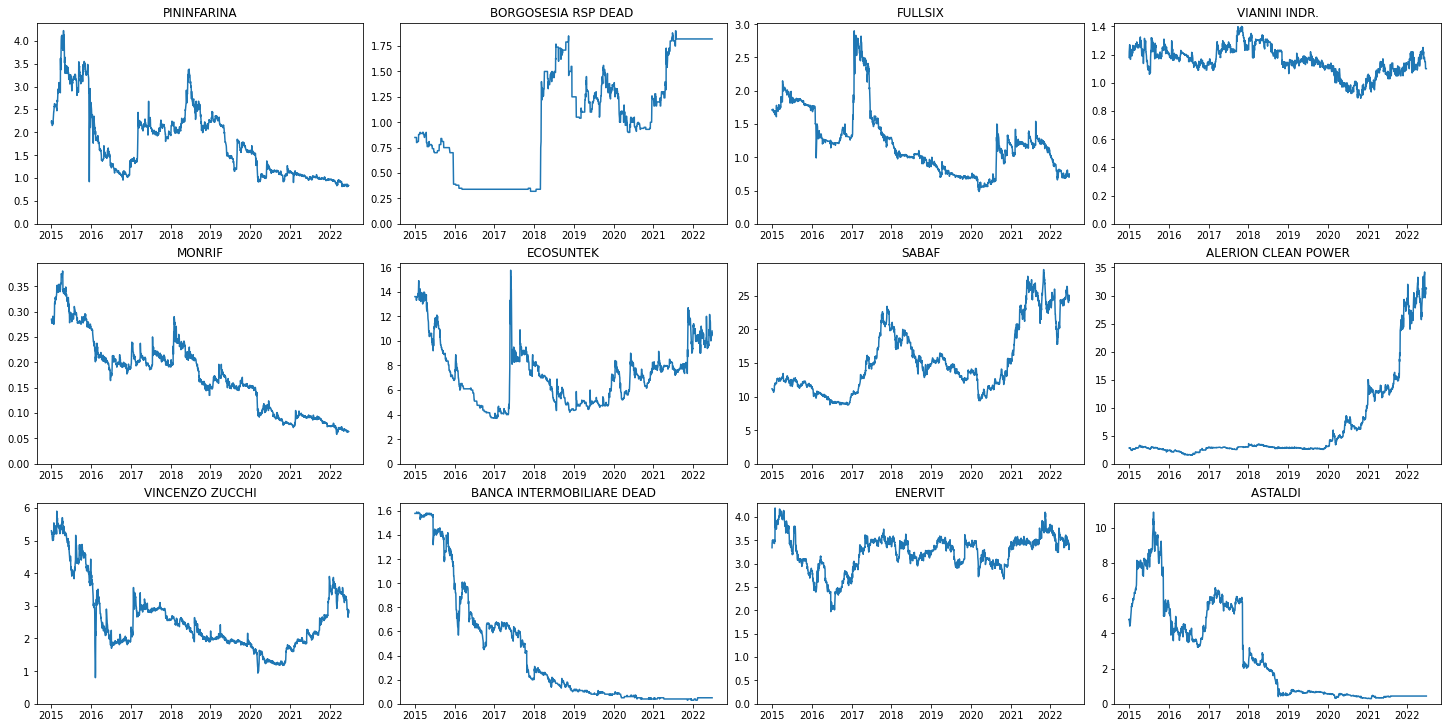

In [18]:
#Plot prices

fig = plt.figure(figsize = (20,10), constrained_layout=True)
ax_array = fig.subplots(3, 4, squeeze=False)
sec_array = np.array(securities).reshape(3,4)
for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].plot(stocks_daily[sec_array[i, j]])
        ax_array[i, j].set_title(sec_array[i, j])
        ax_array[i, j].set_ylim(bottom=0)

plt.savefig("figures/prices_over_time.png",dpi = 400)    

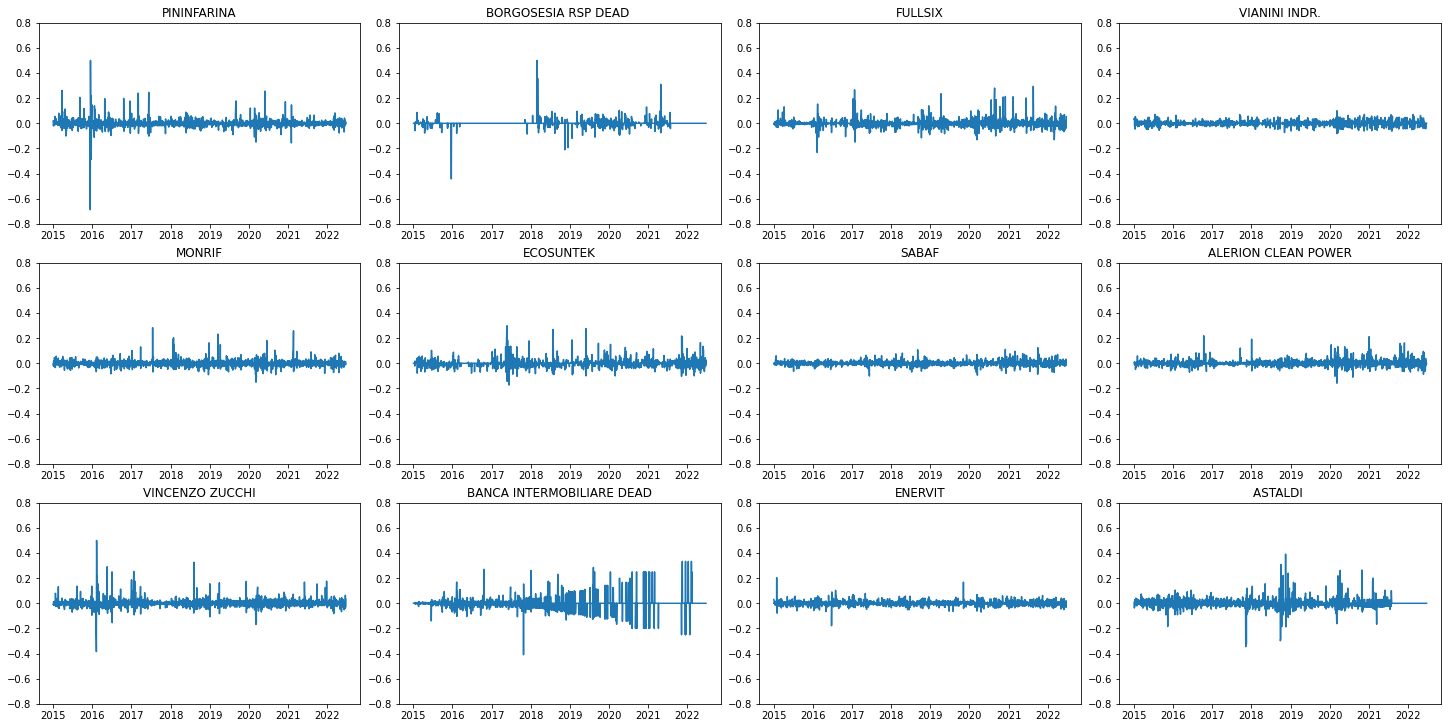

In [19]:
#Plot returns

fig = plt.figure(figsize = (20,10), constrained_layout=True)
ax_array = fig.subplots(3, 4, squeeze=False)
sec_array = np.array(securities).reshape(3,4)
for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].plot(stocks_daily_returns[sec_array[i, j]])
        ax_array[i, j].set_title(sec_array[i, j])
        ax_array[i, j].set_ylim([-0.8, 0.8])

plt.savefig("figures/returns_over_time.png",dpi = 400)        

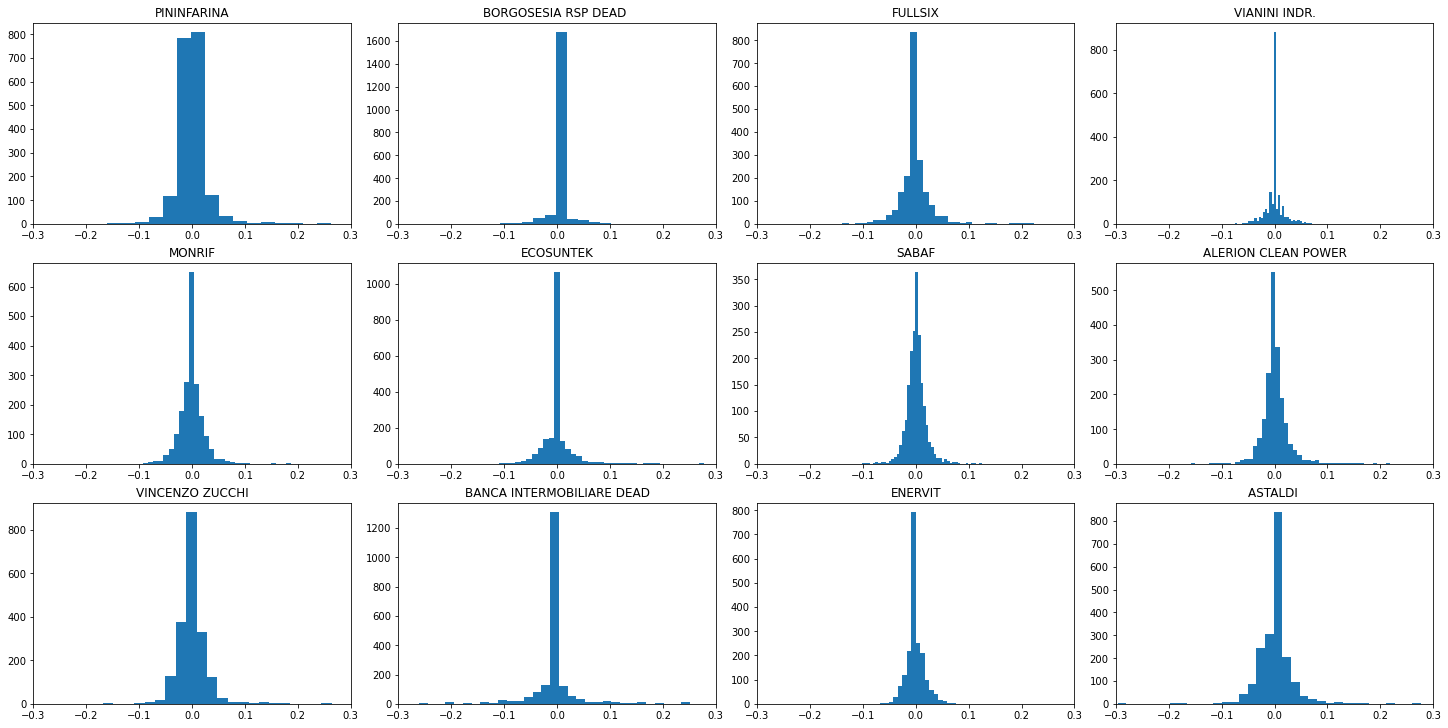

In [20]:
#Distribution of returns

fig = plt.figure(figsize = (20,10), constrained_layout=True)
ax_array = fig.subplots(3, 4, squeeze=False)
sec_array = np.array(securities).reshape(3,4)
for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].hist(stocks_daily_returns[sec_array[i, j]], bins='sqrt')
        ax_array[i, j].set_title(sec_array[i, j])
        ax_array[i, j].set_xlim([-0.3, 0.3])

plt.savefig("figures/distributions_of_returns.png",dpi = 400)       

### 5.

#### Weights

In [21]:
#Define the expected return vector and the variance.covariance matrix for our securities

μ = np.array(stocks_daily_mean[securities]).reshape((len(securities),))
Σ = np.array(stocks_daily_cov.loc[securities, securities])

In [22]:
Σ.shape

(12, 12)

Code for efficient Mean Variance would look like this if implemented from scratch, however we use the more efficient implementation in the PyPortfolioOptimization library.

```python

    def compute_efficient_portfolio(μ, Σ, mu_p):
    
        #Vector of ones with length equal to the number of rows of the variance-covariance matrix
        ι = np.ones((Σ.shape[0]))
    
        #Compute the information matrix
        A = μ.T @ alg.inv(Σ) @ μ 
        B = ι.T @ alg.inv(Σ)@ μ
        C = ι.T @ alg.inv(Σ) @ ι
    
        I = np.array([
            [A , B],
            [B , C]
        ])

        #Compute the weights    
        W = 1/alg.det(I)*alg.inv(Σ)@(C*μ-B)*mu_p + (alg.inv(Σ) @ ι)/alg.det(I)*(A-B*μ)
    
        return W
    
```

In [23]:
#Vector of ones with length equal to the number of rows of the variance-covariance matrix
ι = np.ones((Σ.shape[0]))
    
#Compute the information matrix
A = μ.T @ alg.inv(Σ) @ μ 
B = ι.T @ alg.inv(Σ)@ μ
C = ι.T @ alg.inv(Σ) @ ι
    
I = np.array([
    [A , B],
    [B , C]
])

In [24]:
efficient_mv = EfficientFrontier(μ, Σ, weight_bounds=(-1,1))
W = efficient_mv.efficient_return(0.001)
W = np.array(list(W.values()))

#### Efficient Frontier

In [25]:
def compute_mean_variance_frontier(I, mu_p):
    """
    This function computes the minimum variance obtainable, according to 
    the Mean-Variance frontier, given the Information Matrix (I)
    (which encodes the μ and Σ) and a target expected return (mu_p)
    
    """
    
    
    A = I[0, 0]
    B = I[1, 0]
    C = I[1, 1]
        
    variance_p = 1/(A*C-B**2)*(A - 2*B*mu_p + C*mu_p**2)  
    return variance_p   

In [26]:
A = I[0, 0]
B = I[1, 0]
C = I[1, 1]

print(f"The minimum variance point on the efficient frontier has E(R) = {B/C:.6f} and σ = {1/C:.6f}")

The minimum variance point on the efficient frontier has E(R) = 0.000334 and σ = 0.000079


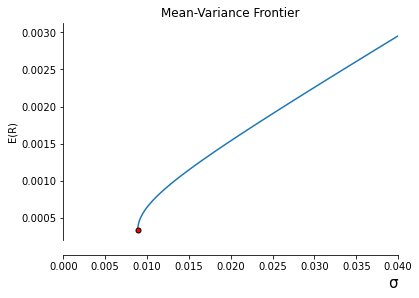

In [27]:
mu_p_top = np.linspace(B/C, 0.003, 100)
variance_p_top = compute_mean_variance_frontier(I, mu_p_top)


fig, ax = plt.subplots()

#Efficient frontier without constraints
ax.plot(np.sqrt(variance_p_top),    mu_p_top,    color = "tab:blue")

ax.set_xlim([0, 0.04])

#Axes aesthetics
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.plot(1/np.sqrt(C), B/C, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red")

plt.xlabel("σ",fontdict={"fontsize":15}, loc="right")
plt.ylabel("E(R)")

plt.title("Mean-Variance Frontier");

plt.savefig("figures/mean_variance_frontier.png",dpi = 400) 

### 6.

In [28]:
efficient_frontier = EfficientFrontier(μ, Σ, weight_bounds=(0, 1))

In [29]:
W_constrained = list(efficient_frontier.efficient_return(0.001).values())
print(np.matrix(W_constrained))

[[0.01105532 0.17601003 0.         0.03322849 0.         0.033481
  0.23497768 0.44554191 0.00944129 0.         0.05626428 0.        ]]


In [30]:
#Efficient frontier without constraints
mu_p_top = np.linspace(B/C, 0.0018, 100)
variance_p_top = compute_mean_variance_frontier(I, mu_p_top)
 
#Efficient frontier with constraint    
mu_p_top_constrained = np.linspace(B/C, 0.0015, 100)
portfolios_constrained = map(efficient_frontier.efficient_return, mu_p_top_constrained)
W_c_array = np.array([list(portfolio.values()) for portfolio in portfolios_constrained])
variance_p_top_constrained = np.diag(W_c_array @ Σ @ W_c_array.T)

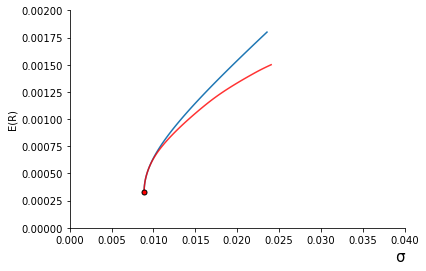

In [31]:
fig, ax = plt.subplots()

#Efficient frontier without constraints plotting
ax.plot(np.sqrt(variance_p_top),    mu_p_top,    color = "tab:blue")

#Efficient frontier with constraint plotting
ax.plot(np.sqrt(variance_p_top_constrained), mu_p_top_constrained, color = "red", alpha=0.8)

ax.set_xlim([0, 0.04])
ax.set_ylim([0, 0.002])

#Axes aesthetics
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.plot(1/np.sqrt(C), B/C, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red")

#Labels
plt.xlabel("σ",fontdict={"fontsize":15}, loc="right")
plt.ylabel("E(R)")

;

plt.savefig("figures/mean_variance_frontier_constrained.png",dpi = 400,) 

### 7.

In [32]:
def coskew(df):
    
    # Number of stocks
    num = len(df.columns)
    
    # Two dimionsal matrix for tensor product 
    mtx = np.zeros(shape = (len(df), num**2))
    
    v = df.values
    means = v.mean(0,keepdims=True)
    v1 = (v-means).T
    
    for i in range(num):
        for j in range(num):
                vals = v1[i]*v1[j]
                mtx[:,(i*num)+j] = vals/float((len(df)-1)*df.iloc[:,i].std()*df.iloc[:,j].std())
    
    #coskewness matrix
    m3 = np.dot(v1,mtx)
    
    #Normalize by dividing by standard deviation
    for i in range(num**2):
        use = i%num
        m3[:,i] = m3[:,i]/float(df.iloc[:,use].std())
    
    return m3

In [33]:
def cokurt(df):
    # Number of stocks
    num = len(df.columns)
    
    #First Tensor Product Matrix
    mtx1 = np.zeros(shape = (len(df), num**2))
    
    #Second Tensor Product Matrix
    mtx2 = np.zeros(shape = (len(df), num**3))
    
    v = df.values
    means = v.mean(0,keepdims=True)
    v1 = (v-means).T

    for k in range(num):
        for i in range(num):
            for j in range(num):
                    vals = v1[i]*v1[j]*v1[k]
                    mtx2[:,(k*(num**2))+(i*num)+j] = vals/float((len(df)-1)*df.iloc[:,i].std()*\
                                                                df.iloc[:,j].std()*df.iloc[:,k].std())

    m4 = np.dot(v1,mtx2)
    for i in range(num**3):
        use = i%num
        m4[:,i] = m4[:,i]/float(df.iloc[:,use].std())
        
    return m4



In [34]:
def portfolio_statistics(W, μ, Σ):
    stats = {}
    stats["Mean"] = np.sum(μ * W)
    
    stats["Variance"] = np.dot(W.T, np.dot(Σ, W))
    
    stats["Standard Deviation"] = np.sqrt(stats["Variance"])
    
    m3 = coskew(stocks_daily_returns[securities].dropna())
    stats["Skewness"] = np.dot(W.T, np.dot(m3,np.kron(W,W)))

    m4 = cokurt(stocks_daily_returns[securities].dropna())
    stats["Kurtosis"] = np.dot(W.T, np.dot(m4,np.kron(W,np.kron(W,W))))
    return stats



In [35]:
portfolio_statistics(W, μ, Σ) 

{'Mean': 0.0010000000000000002,
 'Variance': 0.00017748719973567073,
 'Standard Deviation': 0.01332243220045314,
 'Skewness': 0.10204814319964339,
 'Kurtosis': 0.7118680571645606}

#### Constrained Portfolio Statistics

In [36]:
portfolio_statistics(np.array(W_constrained), μ, Σ) 

{'Mean': 0.001,
 'Variance': 0.00020244880155769339,
 'Standard Deviation': 0.014228450427143968,
 'Skewness': 0.15599270626300593,
 'Kurtosis': 1.0897730973376225}

### 9.

In [37]:
#Read excel and remove first two rows

ftse_daily = pd.read_excel("data for exam 2022.xlsx", "ftse italia all share daily", index_col = "Name", )
ftse_daily = ftse_daily.iloc[2:]
ftse_daily = ftse_daily.astype("float32")


In [38]:
ftse_daily_returns = ftse_daily.pct_change()

ftse_daily_returns.to_excel("FTSE_Returns.xlsx")
ftse_daily_returns

,FTSE ITALIA ALL SHARE - PRICE INDEX
Name,
01/01/2015,NaN
02/01/2015,0.006858
05/01/2015,-0.044704
06/01/2015,-0.003546
07/01/2015,-0.001583
...,...
23/06/2022,-0.007977
24/06/2022,0.022661
27/06/2022,-0.007719


#### Mean

In [39]:
ftse_daily_mean = ftse_daily_returns.mean()
print(f"Mean: {ftse_daily_mean[0]}")

Mean: 0.00018701027147471905


#### Standard Deviation

In [40]:
ftse_daily_std = ftse_daily_returns.std()

print(f"Standard Deviation: {ftse_daily_std[0]}")

Standard Deviation: 0.014032217673957348


#### Variance

In [41]:
ftse_daily_var = ftse_daily_returns.var()

print(f"Variance: {ftse_daily_var[0]}")

Variance: 0.00019690312910825014


#### Skewness

In [42]:
ftse_daily_skew = ftse_daily_returns.skew()

print(f"Skewness: {ftse_daily_skew[0]}")

Skewness: -1.3915475606918335


#### Kurtosis

In [43]:
ftse_daily_kurtosis = ftse_daily_returns.kurtosis()

print(f"Kurtosis: {ftse_daily_kurtosis[0]}")

Kurtosis: 15.830971717834473


### 10.

In [44]:
betas = {}

for security in securities:
    
    beta, alpha = stats.linregress(x=ftse_daily_returns[1:1952].iloc[:,0],
                y=[*stocks_daily_returns[security][1:].values])[0:2]
                
    betas[security] = beta
    
    print(f"The beta for {security} is {beta:.4f}")

The beta for PININFARINA is 0.6577
The beta for BORGOSESIA RSP DEAD  is 0.0982
The beta for FULLSIX is 0.3868
The beta for VIANINI INDR. is 0.1105
The beta for MONRIF is 0.3187
The beta for ECOSUNTEK is 0.2794
The beta for SABAF is 0.3973
The beta for ALERION CLEAN POWER is 0.4210
The beta for VINCENZO ZUCCHI is 0.6645
The beta for BANCA INTERMOBILIARE DEAD is 0.5235
The beta for ENERVIT is 0.2774
The beta for ASTALDI  is 0.8462


In [45]:
portfolio_returns = (stocks_daily_returns[securities]*W).sum(axis=1)

(beta_portfolio, alpha) = stats.linregress(x=ftse_daily_returns[1:1952].iloc[:,0],
             y= [*portfolio_returns.values][1:])[0:2]
                

print(f"The beta for the Portfolio is {beta_portfolio:.4f}")

The beta for the Portfolio is 0.2878


### 11.

In [46]:
#Convert anual rate to daily
risk_free_rate_daily = 1.0005**(1/365)-1

In [47]:
SML_portfolio = risk_free_rate_daily + (ftse_daily_mean - risk_free_rate_daily) * beta_portfolio
SML_pininfarina = risk_free_rate_daily + (ftse_daily_mean - risk_free_rate_daily) * betas["PININFARINA"]
SML_fullsix = risk_free_rate_daily + (ftse_daily_mean  - risk_free_rate_daily) * betas["FULLSIX"]

return_portfolio = 0.001
return_pininfarina = stocks_daily_mean["PININFARINA"]
return_fullsix = stocks_daily_mean["FULLSIX"]

print(f"SML Portfolio: {SML_portfolio.values[0]:.8f}")
print(f"SML Pininfarina: {SML_pininfarina.values[0]:.8f}")
print(f"SML Fullsix: {SML_fullsix.values[0]:.8f}")

SML Portfolio: 0.00005479
SML Pininfarina: 0.00012346
SML Fullsix: 0.00007318


/home/santiago/miniconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


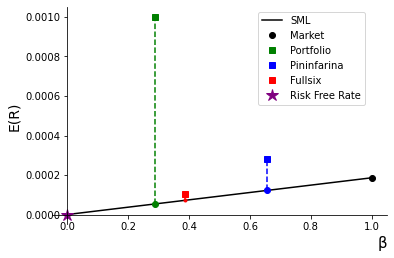

In [48]:
fig, ax = plt.subplots()

#Security Market Line
plt.plot([0,1], (risk_free_rate_daily, ftse_daily_mean), 'k', label="SML")

#Portfolio and Securities
plt.plot(1, ftse_daily_mean, 'ko', label="Market")

#Returns
plt.plot(beta_portfolio, return_portfolio, 'gs', label="Portfolio")
plt.plot(betas["PININFARINA"],  return_pininfarina, 'bs', label="Pininfarina")
plt.plot(betas["FULLSIX"], return_fullsix, 'rs', label="Fullsix")

#Proyection over the SML
plt.plot(beta_portfolio, SML_portfolio, 'go')
plt.plot(betas["PININFARINA"],  SML_pininfarina, 'bo')
plt.plot(betas["FULLSIX"], SML_fullsix, 'r.')

#Dashed lines
plt.vlines(beta_portfolio, SML_portfolio, return_portfolio, 'g', linestyle = "dashed")
plt.vlines(betas["PININFARINA"], SML_pininfarina, return_pininfarina, 'b', linestyle = "dashed")
plt.vlines(betas["FULLSIX"], SML_fullsix, return_fullsix, 'r', linestyle = "dashed")
           
#Axes aesthetics
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.set_xlabel("β", fontsize=15, loc="right")
ax.set_ylabel("E(R)", fontsize=14)

ax.plot(0, risk_free_rate_daily, "*", color="purple", markersize = 12, label = "Risk Free Rate")

ax.legend(bbox_to_anchor=(0.6, 1));

plt.savefig("figures/Security_Market_Line.png",dpi = 400,) 

### 12.

In [49]:
#We set the risk aversion coefficient to 3
γ =  3

In [50]:
#Pick Matrix
P = np.array([[0 ,0,0,0,0   ,  1,0,0  ,0 ,0   ,0,0],
              [-1,0,0,0,0   ,  0,1,0  ,0 ,0   ,0,0],
              [0 ,0,0,1,0   ,  0,0,0  ,-1,0   ,0,0],
              [0 ,0,0,0,0   ,  0,0,0  ,0 ,0   ,1,0],
              [0 ,0,0,0,-0.3,0.6,0,0.4,0 ,-0.7,0,0]])

#Views
Q = np.array([0.0009, 0.0007, 0.0009, -0.0006, 0.0015])

In [51]:
bl = BlackLittermanModel(Σ, pi=μ, P=P, Q=Q)

In [52]:
mu_bl = np.array(bl.bl_returns())
covariance_bl = np.array(bl.bl_cov())

W_bl = 1/γ * alg.inv(covariance_bl) @ mu_bl

In [53]:
bl_stats = portfolio_statistics(W_bl, mu_bl, covariance_bl) 
sharpe_ratio_bl = (bl_stats['Mean'] - risk_free_rate_daily)/bl_stats['Standard Deviation']

print(f"The mean return for the Black-Litterman portfolio is {bl_stats['Mean']:.6f}")
print(f"The variance for the Black-Litterman portfolio is {bl_stats['Variance']:.6f}")
print(f"The volatility for the Black-Litterman portfolio is {bl_stats['Standard Deviation']:.6f}")
print(f"The skewness for the Black-Litterman portfolio is {bl_stats['Skewness']:.6f}")
print(f"The kurtosis for the Black-Litterman portfolio is {bl_stats['Kurtosis']:.6f}")
print(f"The Sharpe Ratio for the Black-Litterman portfolio is {sharpe_ratio_bl:.6f}")

The mean return for the Black-Litterman portfolio is 0.002010
The variance for the Black-Litterman portfolio is 0.000670
The volatility for the Black-Litterman portfolio is 0.025885
The skewness for the Black-Litterman portfolio is 0.756987
The kurtosis for the Black-Litterman portfolio is 7.937806
The Sharpe Ratio for the Black-Litterman portfolio is 0.077602


### 13.

#### Bayesian allocation

In [54]:
mu_prior = μ + stocks_daily_std[securities] 
covariance_prior = 2 * Σ
T = stocks_daily_returns.shape[0]-1

covariance_bayesian = alg.inv(T*alg.inv(Σ) + alg.inv(covariance_prior))
mu_bayesian = covariance_bayesian @ (T* alg.inv(Σ) @ μ + alg.inv(covariance_prior) @ mu_prior)

W_bayesian = 1/γ * (alg.inv(covariance_bayesian) @ mu_bayesian)

In [55]:
bayesian_stats = portfolio_statistics(W_bayesian, mu_bayesian, covariance_bayesian) 
sharpe_ratio_bayesian = (bayesian_stats['Mean'] - risk_free_rate_daily)/bayesian_stats['Standard Deviation']

print(f"The mean return for the Bayesian portfolio is {bayesian_stats['Mean']:.4f}")
print(f"The variance for the Bayesian portfolio is {bayesian_stats['Variance']:.4f}")
print(f"The volatility for the Bayesian portfolio is {bayesian_stats['Standard Deviation']:.4f}")
print(f"The skewness for the Bayesian portfolio is {bayesian_stats['Skewness']:.4f}")
print(f"The kurtosis for the Bayesian portfolio is {bayesian_stats['Kurtosis']:.4f}")
print(f"The Sharpe Ratio for the Bayesian portfolio is {sharpe_ratio_bayesian:.4f}")

The mean return for the Bayesian portfolio is 3.8810
The variance for the Bayesian portfolio is 1.2937
The volatility for the Bayesian portfolio is 1.1374
The skewness for the Bayesian portfolio is 6086301923.7130
The kurtosis for the Bayesian portfolio is 127436718270185.1406
The Sharpe Ratio for the Bayesian portfolio is 3.4122


In [56]:
W_bayesian

array([  94.51092484,  579.53358133,   38.49688522,  177.38818536,
       -513.65998926,  158.20130911,  850.1685221 , 1456.3267148 ,
         78.2557586 , -186.49856252,  327.47087939, -266.27151185])

#### Jorion allocation

In [57]:
W_minimum_variance = (alg.inv(Σ) @ ι) / (ι.T @ alg.inv(Σ) @ ι) 
mu_minimum_variance = B/C
minimum_variance = 1/C

N = len(securities)

covariance_estimator = T*Σ/(T-N-2)

h = (N+2)/((μ - mu_minimum_variance).T @ alg.inv(covariance_estimator) @ (μ - mu_minimum_variance))
δ = h/(h+T)

In [58]:
mu_jorion = (1-δ)*μ + δ*mu_minimum_variance
covariance_jorion = (1+1/(T+h)) * covariance_estimator + h/(T*(T+1+h)) * (np.ones([12,12])/(ι.T@alg.inv(covariance_estimator)@ι))

W_jorion = 1/γ * (alg.inv(covariance_jorion) @ mu_jorion)

In [59]:
jorion_stats = portfolio_statistics(W_jorion, mu_jorion, covariance_jorion) 
sharpe_ratio_jorion = (jorion_stats['Mean'] - risk_free_rate_daily)/jorion_stats['Standard Deviation']

print(f"The mean return for the Jorion portfolio is {jorion_stats['Mean']:.6f}")
print(f"The variance for the Jorion portfolio is {jorion_stats['Variance']:.6f}")
print(f"The volatility for the Jorion portfolio is {jorion_stats['Standard Deviation']:.6f}")
print(f"The skewness for the Jorion portfolio is {jorion_stats['Skewness']:.6f}")
print(f"The kurtosis for the Jorion portfolio is {jorion_stats['Kurtosis']:.6f}")
print(f"The Sharpe Ratio for the Jorion portfolio is {sharpe_ratio_jorion:.6f}")

The mean return for the Jorion portfolio is 0.000686
The variance for the Jorion portfolio is 0.000229
The volatility for the Jorion portfolio is 0.015125
The skewness for the Jorion portfolio is 0.099654
The kurtosis for the Jorion portfolio is 1.380471
The Sharpe Ratio for the Jorion portfolio is 0.045284


### 14.

In [60]:
W_gmv = efficient_mv.efficient_return(B/C)
W_gmv = np.array(list(W_gmv.values()))

In [61]:
gmv_stats = portfolio_statistics(W_gmv, μ, Σ) 
sharpe_ratio_gmv = (B/C - risk_free_rate_daily)/(1/np.sqrt(C))



print(f"The mean return for the Global Minimum Variance portfolio is {gmv_stats['Mean']:.6f}")
print(f"The variance for the Global Minimum Variance portfolio is {gmv_stats['Variance']:.6f}")
print(f"The volatility for the Global Minimum Variance portfolio is {gmv_stats['Standard Deviation']:.6f}")
print(f"The skewness for the Global Minimum Variance portfolio is {gmv_stats['Skewness']:.6f}")
print(f"The kurtosis for the Global Minimum Variance portfolio is {gmv_stats['Kurtosis']:.6f}")
print(f"The Sharpe Ratio for the Global Minimum Variance portfolio is {sharpe_ratio_gmv:.6f}")

The mean return for the Global Minimum Variance portfolio is 0.000334
The variance for the Global Minimum Variance portfolio is 0.000079
The volatility for the Global Minimum Variance portfolio is 0.008894
The skewness for the Global Minimum Variance portfolio is -0.010230
The kurtosis for the Global Minimum Variance portfolio is 0.227249
The Sharpe Ratio for the Global Minimum Variance portfolio is 0.037370


### 15.

In [62]:
W_chimera = (0.25 * np.array([W, W_bl, W_jorion, W_gmv])).sum(axis=0)

In [63]:
chimera_stats = portfolio_statistics(W_chimera, μ, Σ) 
sharpe_ratio_chimera = (chimera_stats['Mean'] - risk_free_rate_daily)/chimera_stats['Standard Deviation']
 
print(f"The mean return for the Chimera portfolio is {chimera_stats['Mean']:.6f}")
print(f"The variance for the Chimera portfolio is {chimera_stats['Variance']:.6f}")
print(f"The volatility for the Chimera portfolio is {chimera_stats['Standard Deviation']:.6f}")
print(f"The skewness for the Chimera portfolio is {chimera_stats['Skewness']:.6f}")
print(f"The kurtosis for the Chimera portfolio is {chimera_stats['Kurtosis']:.6f}")
print(f"The Sharpe Ratio for the Chimera portfolio is {sharpe_ratio_chimera:.6f}")

The mean return for the Chimera portfolio is 0.001051
The variance for the Chimera portfolio is 0.000205
The volatility for the Chimera portfolio is 0.014322
The skewness for the Chimera portfolio is 0.123631
The kurtosis for the Chimera portfolio is 0.997431
The Sharpe Ratio for the Chimera portfolio is 0.073325


### Save some data to .xlsx files

In [64]:
if not os.path.exists("estimations"):
    os.makedirs("estimations")


names = ["MV", "Black-Litterman", "Bayesian", "Jorion"]
mus = [μ, mu_bl, mu_bayesian, mu_jorion]
mus_dict = {}

for i, mu in enumerate(mus):
    mus_dict[names[i]] = mu
    
pd.DataFrame(mus_dict).to_excel("estimations/mus.xlsx")

In [65]:
covariances = [Σ, covariance_bl, covariance_bayesian, covariance_jorion]

with pd.ExcelWriter('estimations/covariance.xlsx') as writer:
    for i, covariance in enumerate(covariances):
        df = pd.DataFrame(covariance)
        df.to_excel(writer, sheet_name=f'{names[i]} covariance')
